In [ ]:
import pandas as pd
import numpy as np


In [ ]:
features = [
    "course",
    "cat1",
    "cat2",
    "fat",
    'grade'
]
# Creating a DF for these features

In [ ]:
courses=['PSP', 'Ethics', 'Calculus', 'EVS', 'DBMS', 'French', 'Stats', 'DSA', 'TOC', 'OS','MPI']
cat1=[48,48,42,42,19,45,31,30,35,45,45]
cat2=[49,48,42,29,40,45,45,45,35,37,43]
fat=[93,87,83,63,81,95,95,86,92,90,80]
grades=[94,95,89,74,85,94,93,88,87,90,90]

grade=[]
for i in grades:
  x='F'
  if i>=90:
    x='S'
  elif i>=80:
    x='A'
  elif i>=70:
    x='B'
  elif i>=60:
    x='C'
  elif i>=50:
    x='D'
  elif i>=40:
    x='E'
  grade.append(x)

In [ ]:
df=pd.DataFrame(list(zip(courses,cat_1,cat_2,fat_g,lab,jcomp,grade)), columns=features)


In [ ]:
df

,course,cat_1,cat_2,fat_g,lab,jcomp,grade
0,PSP,S,S,S,NO,NO,S
1,Ethics,S,S,A,NO,NO,S
2,Calculus,A,A,A,YES,NO,A
3,EVS,A,D,C,NO,NO,B
4,DBMS,F,A,A,YES,YES,A
5,French,S,S,S,NO,NO,S
6,Stats,C,S,S,YES,NO,S
7,DSA,C,S,A,YES,NO,A
8,TOC,B,B,S,NO,NO,A
9,OS,S,B,S,YES,NO,S


In [ ]:
df.to_csv (r'C:\Users\admin\Downloads\20BCE1884_ML-Lab-4.csv',  header=True)

In [ ]:
from sklearn import metrics

In [ ]:
from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder()                
df=df.apply(string_to_int.fit_transform) 
df

,course,cat_1,cat_2,fat_g,lab,jcomp,grade
0,8,4,3,2,0,0,2
1,4,4,3,0,0,0,2
2,0,0,0,0,1,0,0
3,3,0,2,1,0,0,1
4,1,3,0,0,1,1,0
5,5,4,3,2,0,0,2
6,9,2,3,2,1,0,2
7,2,2,3,0,1,0,0
8,10,1,1,2,0,0,0
9,7,4,1,2,1,0,2


In [ ]:
feature_cols=features[1:6]
X = df[feature_cols]                        
y = df.grade 
print(X)
print(y)

    cat_1  cat_2  fat_g  lab  jcomp
0       4      3      2    0      0
1       4      3      0    0      0
2       0      0      0    1      0
3       0      2      1    0      0
4       3      0      0    1      1
5       4      3      2    0      0
6       2      3      2    1      0
7       2      3      0    1      0
8       1      1      2    0      0
9       4      1      2    1      0
10      4      0      0    1      1
0     2
1     2
2     0
3     1
4     0
5     2
6     2
7     0
8     0
9     2
10    2
Name: grade, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/11, shuffle=False) 

In [ ]:
from sklearn.tree import DecisionTreeClassifier                            
classifier =DecisionTreeClassifier(criterion="gini", random_state=100)   
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

In [ ]:
y_pred= classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [ ]:
data_p=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
data_p

,Actual,Predicted
10,2,2


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[1]]
              precision    recall  f1-score   support

           2       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [ ]:
import graphviz 

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from six import StringIO
import pydotplus
from IPython.display import Image

In [ ]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names=feature_cols,class_names=['0','1','2','3','4'])

In [ ]:
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())

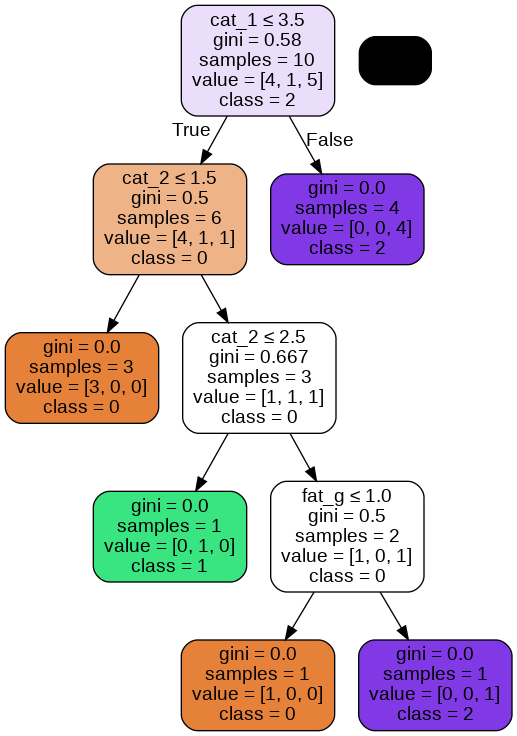

In [ ]:
Image(graph.create_png())

In [ ]:
from sklearn.tree import DecisionTreeClassifier                            
classifier =DecisionTreeClassifier(criterion="entropy", random_state=100)   
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [ ]:
y_pred= classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [ ]:
data_p=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
data_p

,Actual,Predicted
10,2,2


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[1]]
              precision    recall  f1-score   support

           2       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [ ]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names=feature_cols,class_names=['0','1','2'])

In [ ]:
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())

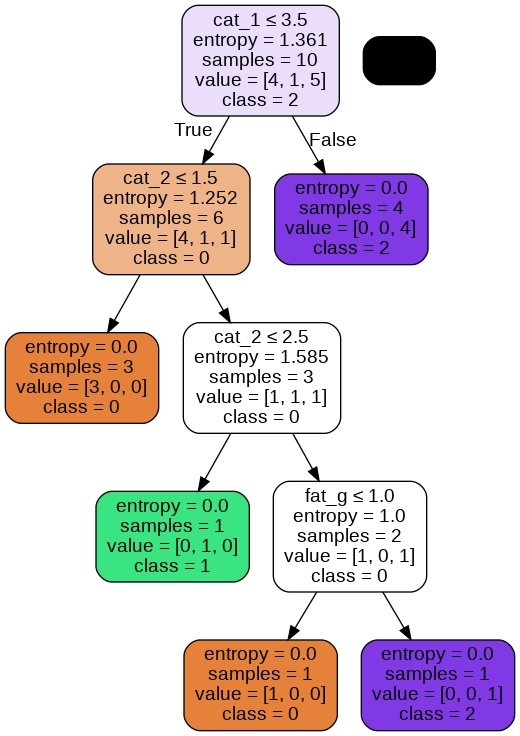

In [ ]:
Image(graph.create_png())